# Reflection ptychography
 - This tutorial shows a reconstruction with a reflection dataset measusred with a two-layer sample at 708 nm, which is used in the publication: "Mengqi Du, Lars Loetgering, Kjeld S.E. Eikema, and Stefan Witte. "Ptychographic optical coherence tomography." Optics Letters 46, no. 6 (2021): 1337-1340." 
 - Download the dataset from figshare: https://figshare.com/articles/dataset/ptyLab_example_data/14915628
 - A kind suggestion: check out general tutorials for CPM (conventional ptychographic microscopy) before diving into this one.

In [2]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import h5py

In [4]:
# import the PtyLab module
import PtyLab
from PtyLab import ExperimentalData
from PtyLab import Reconstruction
from PtyLab import Monitor
from PtyLab import Params
from PtyLab import Engines

Step 1: Download the preprocessed data from figshare: https://figshare.com/articles/dataset/ptyLab_example_data/14915628

In [7]:
# set your data folder as fileFolder 
fileFolder = Path(r"D:\Du\FigshareData")
# select the hdf5 file
fileName = "TwoLayer_bin4.hdf5"
# create the complete filePath
filePath = Path.joinpath(fileFolder,fileName)

Step 2: Initialize the ExperimentalData class 

In [8]:
# Initialize the ExperimentalData using the filePath, and choose the operation Mode (default is 'CPM')
experimentalData = ExperimentalData(filePath, operationMode='CPM')
# show measured ptychogram in log scale. Need to close the window to continue
experimentalData.showPtychogram()

"Unable to open object (object 'orientation' doesn't exist)"
Min max ptychogram: 0.0, 12029.697265625
Min max ptychogram: 0.0, 4.080290798564943
0.0 4.080290798564943


Step 3: Initialize the Monitor class and set properties

In [10]:
# Initialize the Monitor class
monitor = Monitor()
# Set monitor properties
monitor.figureUpdateFrequency = 1 
monitor.objectPlot = 'complex'  # complex abs angle
monitor.verboseLevel = 'high'  # high: plot two figures, low: plot only one figure
monitor.probeZoom = 1  # control probe plot FoV
monitor.objectZoom = 2   # control object plot FoV
monitor.objectContrast = 0.8  # control object plot contrast, 0-1, higher constrast with smaller number
monitor.probeContrast = 0.5  # control probe plot contrast, 0-1, higher constrast with smaller number

Step 4: Initialize the Params class and set properties

In [11]:
# Initialize the Params class
params = Params()
# Set params properties
params.gpuSwitch = True
params.positionOrder = 'random'  # 'sequential' or 'random'
params.propagator = 'Fraunhofer'  # Fraunhofer Fresnel ASP scaledASP polychromeASP scaledPolychromeASP
params.probePowerCorrectionSwitch = True
params.comStabilizationSwitch = True
params.fftshiftSwitch = False
params.backgroundModeSwitch = True
params.intensityConstraint = 'standard'  

Step 5: Initialize the Reconstruction class and set properties

In [13]:
# Initialize the Reconstruction class
reconstruction = Reconstruction(experimentalData, params)
# reconstruction.No = 2**11

# choose the inital format of the probe and object, and initialize them
reconstruction.initialProbe = 'circ'
reconstruction.initialObject = 'ones'
reconstruction.initializeObjectProbe()

# Optional: customize initial probe quadratic phase: 
# since we know our beam is divergent, we add a diverging wavefront to the initial beam
reconstruction.probe = reconstruction.probe*np.exp(1.j*2*np.pi/reconstruction.wavelength *
                                             (reconstruction.Xp**2+reconstruction.Yp**2)/(3*6e-3))

Copying attribute wavelength
Copying attribute dxd
Copying attribute theta
Copying attribute spectralDensity
Copying attribute entrancePupilDiameter


Step 6: Choose the engine, set the properties, and do reconstruction

d:\du\ptylab\PtyLab\Engines\BaseEngine.py:376: UserWarning: fftshiftSwitch set to false, this may lead to reduced performance
  warnings.warn(


<IPython.core.display.Javascript object>


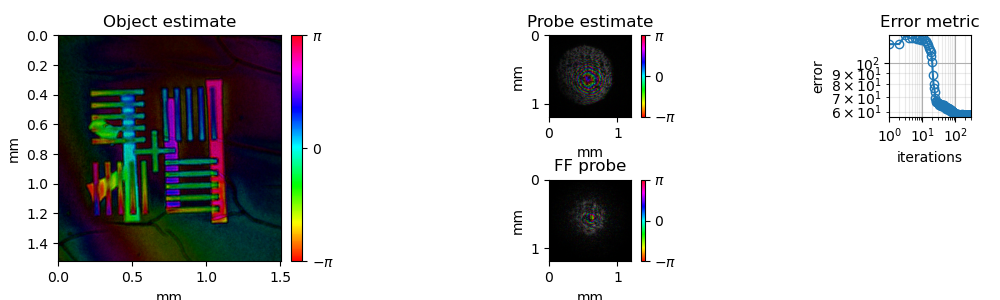

<IPython.core.display.Javascript object>


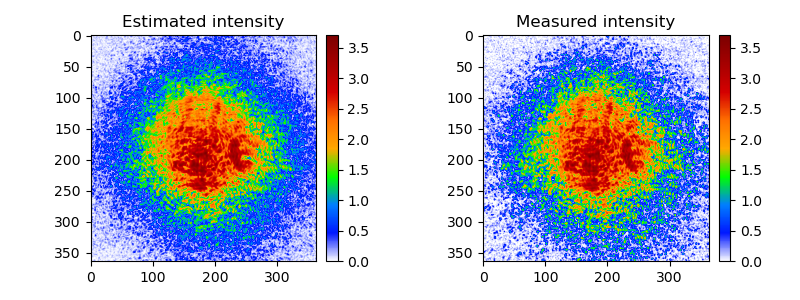

mPIE:   0%|                                                                                    | 0/300 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 321.08it/s]


                                                                                                                       
iteration: 0                                                                                                           
error: 122.6                                                                                                           
estimated linear overlap: 89.8 %                                                                                       
estimated area overlap: 82.0 %                                                                                         
mPIE:   0%|▎                                                                           | 1/300 [00:01<05:21,  1.08s/it]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 501.02it/s]


                                                                                                                       
iteration: 1                                                                                                           
error: 122.8                                                                                                           
estimated linear overlap: 89.8 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:   1%|▌                                                                           | 2/300 [00:01<04:41,  1.06it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 486.21it/s]


                                                                                                                       
iteration: 2                                                                                                           
error: 134.7                                                                                                           
estimated linear overlap: 88.1 %                                                                                       
estimated area overlap: 81.7 %                                                                                         
mPIE:   1%|▊                                                                           | 3/300 [00:02<04:24,  1.12it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 495.33it/s]


                                                                                                                       
iteration: 3                                                                                                           
error: 130.7                                                                                                           
estimated linear overlap: 88.9 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:   1%|█                                                                           | 4/300 [00:03<04:14,  1.16it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 487.07it/s]


                                                                                                                       
iteration: 4                                                                                                           
error: 130.7                                                                                                           
estimated linear overlap: 89.5 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
mPIE:   2%|█▎                                                                          | 5/300 [00:04<04:03,  1.21it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 461.99it/s]


                                                                                                                       
iteration: 5                                                                                                           
error: 130.8                                                                                                           
estimated linear overlap: 89.7 %                                                                                       
estimated area overlap: 78.6 %                                                                                         
mPIE:   2%|█▌                                                                          | 6/300 [00:05<03:57,  1.24it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 508.28it/s]


                                                                                                                       
iteration: 6                                                                                                           
error: 129.3                                                                                                           
estimated linear overlap: 90.1 %                                                                                       
estimated area overlap: 79.2 %                                                                                         
mPIE:   2%|█▊                                                                          | 7/300 [00:05<03:50,  1.27it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 500.43it/s]


                                                                                                                       
iteration: 7                                                                                                           
error: 129.3                                                                                                           
estimated linear overlap: 90.2 %                                                                                       
estimated area overlap: 78.8 %                                                                                         
mPIE:   3%|██                                                                          | 8/300 [00:06<03:45,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 448.36it/s]


                                                                                                                       
iteration: 8                                                                                                           
error: 128.5                                                                                                           
estimated linear overlap: 90.4 %                                                                                       
estimated area overlap: 78.8 %                                                                                         
mPIE:   3%|██▎                                                                         | 9/300 [00:07<03:45,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 511.89it/s]


                                                                                                                       
iteration: 9                                                                                                           
error: 129.5                                                                                                           
estimated linear overlap: 90.6 %                                                                                       
estimated area overlap: 78.8 %                                                                                         
mPIE:   3%|██▌                                                                        | 10/300 [00:08<03:39,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 504.42it/s]


                                                                                                                       
iteration: 10                                                                                                          
error: 129.2                                                                                                           
estimated linear overlap: 90.7 %                                                                                       
estimated area overlap: 78.6 %                                                                                         
mPIE:   4%|██▊                                                                        | 11/300 [00:08<03:34,  1.35it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 460.25it/s]


                                                                                                                       
iteration: 11                                                                                                          
error: 127.2                                                                                                           
estimated linear overlap: 90.6 %                                                                                       
estimated area overlap: 79.1 %                                                                                         
mPIE:   4%|███                                                                        | 12/300 [00:09<03:36,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 408.46it/s]


                                                                                                                       
iteration: 12                                                                                                          
error: 127.3                                                                                                           
estimated linear overlap: 90.8 %                                                                                       
estimated area overlap: 79.7 %                                                                                         
mPIE:   4%|███▎                                                                       | 13/300 [00:10<03:41,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 506.31it/s]


                                                                                                                       
iteration: 13                                                                                                          
error: 124.6                                                                                                           
estimated linear overlap: 90.5 %                                                                                       
estimated area overlap: 81.1 %                                                                                         
mPIE:   5%|███▌                                                                       | 14/300 [00:11<03:35,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 516.49it/s]


                                                                                                                       
iteration: 14                                                                                                          
error: 122.1                                                                                                           
estimated linear overlap: 90.2 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
mPIE:   5%|███▊                                                                       | 15/300 [00:11<03:32,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 488.48it/s]


                                                                                                                       
iteration: 15                                                                                                          
error: 117.9                                                                                                           
estimated linear overlap: 90.0 %                                                                                       
estimated area overlap: 82.0 %                                                                                         
mPIE:   5%|████                                                                       | 16/300 [00:12<03:34,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 470.20it/s]


                                                                                                                       
iteration: 16                                                                                                          
error: 115.6                                                                                                           
estimated linear overlap: 89.5 %                                                                                       
estimated area overlap: 84.0 %                                                                                         
mPIE:   6%|████▎                                                                      | 17/300 [00:13<03:39,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 434.89it/s]


                                                                                                                       
iteration: 17                                                                                                          
error: 112.5                                                                                                           
estimated linear overlap: 89.1 %                                                                                       
estimated area overlap: 83.7 %                                                                                         
mPIE:   6%|████▌                                                                      | 18/300 [00:14<03:46,  1.25it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 459.26it/s]


                                                                                                                       
iteration: 18                                                                                                          
error: 108.5                                                                                                           
estimated linear overlap: 88.5 %                                                                                       
estimated area overlap: 84.1 %                                                                                         
mPIE:   6%|████▊                                                                      | 19/300 [00:15<03:45,  1.25it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 509.65it/s]


                                                                                                                       
iteration: 19                                                                                                          
error: 101.7                                                                                                           
estimated linear overlap: 87.3 %                                                                                       
estimated area overlap: 83.6 %                                                                                         
mPIE:   7%|█████                                                                      | 20/300 [00:15<03:39,  1.28it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 488.82it/s]


                                                                                                                       
iteration: 20                                                                                                          
error: 88.5                                                                                                            
estimated linear overlap: 86.5 %                                                                                       
estimated area overlap: 83.0 %                                                                                         
mPIE:   7%|█████▎                                                                     | 21/300 [00:16<03:36,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 428.67it/s]


                                                                                                                       
iteration: 21                                                                                                          
error: 80.1                                                                                                            
estimated linear overlap: 86.4 %                                                                                       
estimated area overlap: 81.9 %                                                                                         
mPIE:   7%|█████▌                                                                     | 22/300 [00:17<03:38,  1.27it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 493.30it/s]


                                                                                                                       
iteration: 22                                                                                                          
error: 77.3                                                                                                            
estimated linear overlap: 86.3 %                                                                                       
estimated area overlap: 82.1 %                                                                                         
mPIE:   8%|█████▊                                                                     | 23/300 [00:18<03:34,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 486.60it/s]


                                                                                                                       
iteration: 23                                                                                                          
error: 73.8                                                                                                            
estimated linear overlap: 86.4 %                                                                                       
estimated area overlap: 81.2 %                                                                                         
mPIE:   8%|██████                                                                     | 24/300 [00:18<03:32,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 444.95it/s]


                                                                                                                       
iteration: 24                                                                                                          
error: 69.6                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 81.5 %                                                                                         
mPIE:   8%|██████▎                                                                    | 25/300 [00:19<03:35,  1.27it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 452.16it/s]


                                                                                                                       
iteration: 25                                                                                                          
error: 66.7                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
mPIE:   9%|██████▌                                                                    | 26/300 [00:20<03:35,  1.27it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 505.43it/s]


                                                                                                                       
iteration: 26                                                                                                          
error: 66.9                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
mPIE:   9%|██████▊                                                                    | 27/300 [00:21<03:29,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 491.73it/s]


                                                                                                                       
iteration: 27                                                                                                          
error: 66.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
mPIE:   9%|███████                                                                    | 28/300 [00:21<03:26,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 504.21it/s]


                                                                                                                       
iteration: 28                                                                                                          
error: 65.5                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
mPIE:  10%|███████▎                                                                   | 29/300 [00:22<03:24,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 447.17it/s]


                                                                                                                       
iteration: 29                                                                                                          
error: 65.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 81.4 %                                                                                         
mPIE:  10%|███████▌                                                                   | 30/300 [00:23<03:25,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 487.65it/s]


                                                                                                                       
iteration: 30                                                                                                          
error: 65.8                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 81.4 %                                                                                         
mPIE:  10%|███████▊                                                                   | 31/300 [00:24<03:23,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 458.15it/s]


                                                                                                                       
iteration: 31                                                                                                          
error: 64.8                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 81.5 %                                                                                         
mPIE:  11%|████████                                                                   | 32/300 [00:25<03:22,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 461.50it/s]


                                                                                                                       
iteration: 32                                                                                                          
error: 64.4                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 81.1 %                                                                                         
mPIE:  11%|████████▎                                                                  | 33/300 [00:25<03:24,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 507.61it/s]


                                                                                                                       
iteration: 33                                                                                                          
error: 65.1                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 81.7 %                                                                                         
mPIE:  11%|████████▌                                                                  | 34/300 [00:26<03:21,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 494.19it/s]


                                                                                                                       
iteration: 34                                                                                                          
error: 65.1                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 81.5 %                                                                                         
mPIE:  12%|████████▊                                                                  | 35/300 [00:27<03:17,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 461.71it/s]


                                                                                                                       
iteration: 35                                                                                                          
error: 64.2                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 81.5 %                                                                                         
mPIE:  12%|█████████                                                                  | 36/300 [00:28<03:18,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 468.04it/s]


                                                                                                                       
iteration: 36                                                                                                          
error: 64.4                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 81.4 %                                                                                         
mPIE:  12%|█████████▎                                                                 | 37/300 [00:28<03:17,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 426.87it/s]


                                                                                                                       
iteration: 37                                                                                                          
error: 63.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
mPIE:  13%|█████████▌                                                                 | 38/300 [00:29<03:20,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 468.17it/s]


                                                                                                                       
iteration: 38                                                                                                          
error: 64.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 81.3 %                                                                                         
mPIE:  13%|█████████▊                                                                 | 39/300 [00:30<03:19,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 496.70it/s]


                                                                                                                       
iteration: 39                                                                                                          
error: 63.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 81.1 %                                                                                         
mPIE:  13%|██████████                                                                 | 40/300 [00:31<03:16,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 456.56it/s]


                                                                                                                       
iteration: 40                                                                                                          
error: 63.9                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 81.4 %                                                                                         
mPIE:  14%|██████████▎                                                                | 41/300 [00:31<03:17,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 497.07it/s]


                                                                                                                       
iteration: 41                                                                                                          
error: 64.0                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
mPIE:  14%|██████████▌                                                                | 42/300 [00:32<03:12,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 491.91it/s]


                                                                                                                       
iteration: 42                                                                                                          
error: 64.1                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.7 %                                                                                         
mPIE:  14%|██████████▊                                                                | 43/300 [00:33<03:11,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 429.02it/s]


                                                                                                                       
iteration: 43                                                                                                          
error: 64.2                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
mPIE:  15%|███████████                                                                | 44/300 [00:34<03:13,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 457.83it/s]


                                                                                                                       
iteration: 44                                                                                                          
error: 63.9                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 81.5 %                                                                                         
mPIE:  15%|███████████▎                                                               | 45/300 [00:34<03:15,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 492.83it/s]


                                                                                                                       
iteration: 45                                                                                                          
error: 64.0                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 81.1 %                                                                                         
mPIE:  15%|███████████▌                                                               | 46/300 [00:35<03:09,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 498.19it/s]


                                                                                                                       
iteration: 46                                                                                                          
error: 63.2                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 81.2 %                                                                                         
mPIE:  16%|███████████▊                                                               | 47/300 [00:36<03:09,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 444.51it/s]


                                                                                                                       
iteration: 47                                                                                                          
error: 62.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 81.6 %                                                                                         
mPIE:  16%|████████████                                                               | 48/300 [00:37<03:11,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 495.89it/s]


                                                                                                                       
iteration: 48                                                                                                          
error: 63.0                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 81.3 %                                                                                         
mPIE:  16%|████████████▎                                                              | 49/300 [00:37<03:08,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 490.99it/s]


                                                                                                                       
iteration: 49                                                                                                          
error: 62.9                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 81.2 %                                                                                         
mPIE:  17%|████████████▌                                                              | 50/300 [00:38<03:05,  1.35it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 423.70it/s]


                                                                                                                       
iteration: 50                                                                                                          
error: 63.1                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 81.3 %                                                                                         
mPIE:  17%|████████████▊                                                              | 51/300 [00:39<03:10,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 472.93it/s]


                                                                                                                       
iteration: 51                                                                                                          
error: 62.1                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 81.5 %                                                                                         
mPIE:  17%|█████████████                                                              | 52/300 [00:40<03:08,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 492.54it/s]


                                                                                                                       
iteration: 52                                                                                                          
error: 62.9                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 81.4 %                                                                                         
mPIE:  18%|█████████████▎                                                             | 53/300 [00:40<03:05,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 484.70it/s]


                                                                                                                       
iteration: 53                                                                                                          
error: 61.9                                                                                                            
estimated linear overlap: 85.9 %                                                                                       
estimated area overlap: 81.4 %                                                                                         
mPIE:  18%|█████████████▌                                                             | 54/300 [00:41<03:03,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 453.11it/s]


                                                                                                                       
iteration: 54                                                                                                          
error: 62.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 81.3 %                                                                                         
mPIE:  18%|█████████████▋                                                             | 55/300 [00:42<03:05,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 528.41it/s]


                                                                                                                       
iteration: 55                                                                                                          
error: 62.1                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 81.1 %                                                                                         
mPIE:  19%|██████████████                                                             | 56/300 [00:43<03:00,  1.35it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 519.90it/s]


                                                                                                                       
iteration: 56                                                                                                          
error: 62.6                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 81.1 %                                                                                         
mPIE:  19%|██████████████▎                                                            | 57/300 [00:43<02:59,  1.35it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 435.52it/s]


                                                                                                                       
iteration: 57                                                                                                          
error: 62.5                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 81.2 %                                                                                         
mPIE:  19%|██████████████▌                                                            | 58/300 [00:44<03:01,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 442.69it/s]


                                                                                                                       
iteration: 58                                                                                                          
error: 62.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 81.2 %                                                                                         
mPIE:  20%|██████████████▊                                                            | 59/300 [00:45<03:04,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 419.29it/s]


                                                                                                                       
iteration: 59                                                                                                          
error: 62.2                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.8 %                                                                                         
mPIE:  20%|███████████████                                                            | 60/300 [00:46<03:07,  1.28it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 502.23it/s]


                                                                                                                       
iteration: 60                                                                                                          
error: 62.1                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 81.1 %                                                                                         
mPIE:  20%|███████████████▎                                                           | 61/300 [00:46<03:02,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 506.67it/s]


                                                                                                                       
iteration: 61                                                                                                          
error: 61.7                                                                                                            
estimated linear overlap: 85.9 %                                                                                       
estimated area overlap: 81.0 %                                                                                         
mPIE:  21%|███████████████▌                                                           | 62/300 [00:47<02:58,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 495.97it/s]


                                                                                                                       
iteration: 62                                                                                                          
error: 61.8                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 81.0 %                                                                                         
mPIE:  21%|███████████████▊                                                           | 63/300 [00:48<02:56,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 436.99it/s]


                                                                                                                       
iteration: 63                                                                                                          
error: 61.4                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.8 %                                                                                         
mPIE:  21%|████████████████                                                           | 64/300 [00:49<03:00,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 477.26it/s]


                                                                                                                       
iteration: 64                                                                                                          
error: 61.2                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  22%|████████████████▎                                                          | 65/300 [00:49<02:59,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 494.76it/s]


                                                                                                                       
iteration: 65                                                                                                          
error: 60.8                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.6 %                                                                                         
mPIE:  22%|████████████████▌                                                          | 66/300 [00:50<02:56,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 498.57it/s]


                                                                                                                       
iteration: 66                                                                                                          
error: 61.3                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.6 %                                                                                         
mPIE:  22%|████████████████▊                                                          | 67/300 [00:51<02:54,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 428.57it/s]


                                                                                                                       
iteration: 67                                                                                                          
error: 61.5                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.9 %                                                                                         
mPIE:  23%|█████████████████                                                          | 68/300 [00:52<02:56,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 482.63it/s]


                                                                                                                       
iteration: 68                                                                                                          
error: 60.5                                                                                                            
estimated linear overlap: 85.9 %                                                                                       
estimated area overlap: 80.8 %                                                                                         
mPIE:  23%|█████████████████▎                                                         | 69/300 [00:52<02:54,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 503.00it/s]


                                                                                                                       
iteration: 69                                                                                                          
error: 61.0                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.5 %                                                                                         
mPIE:  23%|█████████████████▌                                                         | 70/300 [00:53<02:51,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 472.40it/s]


                                                                                                                       
iteration: 70                                                                                                          
error: 61.0                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.6 %                                                                                         
mPIE:  24%|█████████████████▊                                                         | 71/300 [00:54<02:52,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 420.27it/s]


                                                                                                                       
iteration: 71                                                                                                          
error: 60.9                                                                                                            
estimated linear overlap: 85.9 %                                                                                       
estimated area overlap: 80.8 %                                                                                         
mPIE:  24%|██████████████████                                                         | 72/300 [00:55<02:55,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 479.84it/s]


                                                                                                                       
iteration: 72                                                                                                          
error: 60.8                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.5 %                                                                                         
mPIE:  24%|██████████████████▎                                                        | 73/300 [00:55<02:52,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 500.09it/s]


                                                                                                                       
iteration: 73                                                                                                          
error: 60.3                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  25%|██████████████████▌                                                        | 74/300 [00:56<02:48,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 484.83it/s]


                                                                                                                       
iteration: 74                                                                                                          
error: 60.5                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  25%|██████████████████▊                                                        | 75/300 [00:57<02:48,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 489.07it/s]


                                                                                                                       
iteration: 75                                                                                                          
error: 60.6                                                                                                            
estimated linear overlap: 85.9 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  25%|███████████████████                                                        | 76/300 [00:58<02:47,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 497.51it/s]


                                                                                                                       
iteration: 76                                                                                                          
error: 60.6                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.9 %                                                                                         
mPIE:  26%|███████████████████▎                                                       | 77/300 [00:58<02:45,  1.35it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 443.60it/s]


                                                                                                                       
iteration: 77                                                                                                          
error: 60.1                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  26%|███████████████████▌                                                       | 78/300 [00:59<02:48,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 418.37it/s]


                                                                                                                       
iteration: 78                                                                                                          
error: 60.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.7 %                                                                                         
mPIE:  26%|███████████████████▋                                                       | 79/300 [01:00<02:49,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 493.56it/s]


                                                                                                                       
iteration: 79                                                                                                          
error: 60.1                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  27%|████████████████████                                                       | 80/300 [01:01<02:47,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 488.46it/s]


                                                                                                                       
iteration: 80                                                                                                          
error: 60.1                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  27%|████████████████████▎                                                      | 81/300 [01:01<02:44,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 461.95it/s]


                                                                                                                       
iteration: 81                                                                                                          
error: 59.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  27%|████████████████████▌                                                      | 82/300 [01:02<02:49,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 474.68it/s]


                                                                                                                       
iteration: 82                                                                                                          
error: 59.6                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.5 %                                                                                         
mPIE:  28%|████████████████████▊                                                      | 83/300 [01:03<02:47,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 451.83it/s]


                                                                                                                       
iteration: 83                                                                                                          
error: 59.9                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  28%|█████████████████████                                                      | 84/300 [01:04<02:48,  1.28it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 463.99it/s]


                                                                                                                       
iteration: 84                                                                                                          
error: 59.8                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.9 %                                                                                         
mPIE:  28%|█████████████████████▎                                                     | 85/300 [01:05<02:46,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 488.16it/s]


                                                                                                                       
iteration: 85                                                                                                          
error: 59.6                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.9 %                                                                                         
mPIE:  29%|█████████████████████▌                                                     | 86/300 [01:05<02:43,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 476.32it/s]


                                                                                                                       
iteration: 86                                                                                                          
error: 59.4                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.9 %                                                                                         
mPIE:  29%|█████████████████████▊                                                     | 87/300 [01:06<02:41,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 493.42it/s]


                                                                                                                       
iteration: 87                                                                                                          
error: 59.6                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  29%|██████████████████████                                                     | 88/300 [01:07<02:41,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 486.34it/s]


                                                                                                                       
iteration: 88                                                                                                          
error: 58.9                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  30%|██████████████████████▎                                                    | 89/300 [01:08<02:39,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 447.83it/s]


                                                                                                                       
iteration: 89                                                                                                          
error: 59.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  30%|██████████████████████▌                                                    | 90/300 [01:08<02:40,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 458.73it/s]


                                                                                                                       
iteration: 90                                                                                                          
error: 59.1                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  30%|██████████████████████▊                                                    | 91/300 [01:09<02:40,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 487.84it/s]


                                                                                                                       
iteration: 91                                                                                                          
error: 59.0                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.8 %                                                                                         
mPIE:  31%|███████████████████████                                                    | 92/300 [01:10<02:38,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 486.61it/s]


                                                                                                                       
iteration: 92                                                                                                          
error: 58.9                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.8 %                                                                                         
mPIE:  31%|███████████████████████▎                                                   | 93/300 [01:11<02:36,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 479.84it/s]


                                                                                                                       
iteration: 93                                                                                                          
error: 59.0                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.8 %                                                                                         
mPIE:  31%|███████████████████████▌                                                   | 94/300 [01:11<02:34,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 489.61it/s]


                                                                                                                       
iteration: 94                                                                                                          
error: 58.7                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  32%|███████████████████████▊                                                   | 95/300 [01:12<02:33,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 497.04it/s]


                                                                                                                       
iteration: 95                                                                                                          
error: 58.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.7 %                                                                                         
mPIE:  32%|████████████████████████                                                   | 96/300 [01:13<02:32,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 483.28it/s]


                                                                                                                       
iteration: 96                                                                                                          
error: 58.7                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
mPIE:  32%|████████████████████████▏                                                  | 97/300 [01:14<02:31,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 416.56it/s]


                                                                                                                       
iteration: 97                                                                                                          
error: 58.2                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
mPIE:  33%|████████████████████████▌                                                  | 98/300 [01:14<02:35,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 499.99it/s]


                                                                                                                       
iteration: 98                                                                                                          
error: 58.1                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.8 %                                                                                         
mPIE:  33%|████████████████████████▊                                                  | 99/300 [01:15<02:31,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 513.65it/s]


                                                                                                                       
iteration: 99                                                                                                          
error: 58.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.7 %                                                                                         
mPIE:  33%|████████████████████████▋                                                 | 100/300 [01:16<02:29,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 472.51it/s]


                                                                                                                       
iteration: 100                                                                                                         
error: 58.5                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.9 %                                                                                         
mPIE:  34%|████████████████████████▉                                                 | 101/300 [01:17<02:29,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 479.02it/s]


                                                                                                                       
iteration: 101                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  34%|█████████████████████████▏                                                | 102/300 [01:17<02:28,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 483.53it/s]


                                                                                                                       
iteration: 102                                                                                                         
error: 58.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  34%|█████████████████████████▍                                                | 103/300 [01:18<02:27,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 442.89it/s]


                                                                                                                       
iteration: 103                                                                                                         
error: 58.3                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.7 %                                                                                         
mPIE:  35%|█████████████████████████▋                                                | 104/300 [01:19<02:29,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 396.88it/s]


                                                                                                                       
iteration: 104                                                                                                         
error: 58.6                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.7 %                                                                                         
mPIE:  35%|█████████████████████████▉                                                | 105/300 [01:20<02:32,  1.27it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 487.57it/s]


                                                                                                                       
iteration: 105                                                                                                         
error: 58.0                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
mPIE:  35%|██████████████████████████▏                                               | 106/300 [01:21<02:29,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 499.09it/s]


                                                                                                                       
iteration: 106                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.8 %                                                                                         
mPIE:  36%|██████████████████████████▍                                               | 107/300 [01:21<02:26,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 474.53it/s]


                                                                                                                       
iteration: 107                                                                                                         
error: 57.9                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
mPIE:  36%|██████████████████████████▋                                               | 108/300 [01:22<02:24,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 477.37it/s]


                                                                                                                       
iteration: 108                                                                                                         
error: 58.1                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  36%|██████████████████████████▉                                               | 109/300 [01:23<02:24,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 453.58it/s]


                                                                                                                       
iteration: 109                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.7 %                                                                                         
mPIE:  37%|███████████████████████████▏                                              | 110/300 [01:24<02:24,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 460.04it/s]


                                                                                                                       
iteration: 110                                                                                                         
error: 58.3                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
mPIE:  37%|███████████████████████████▍                                              | 111/300 [01:24<02:24,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 504.90it/s]


                                                                                                                       
iteration: 111                                                                                                         
error: 58.1                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  37%|███████████████████████████▋                                              | 112/300 [01:25<02:21,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 439.71it/s]


                                                                                                                       
iteration: 112                                                                                                         
error: 58.4                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  38%|███████████████████████████▊                                              | 113/300 [01:26<02:22,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 491.24it/s]


                                                                                                                       
iteration: 113                                                                                                         
error: 58.3                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  38%|████████████████████████████                                              | 114/300 [01:27<02:20,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 492.50it/s]


                                                                                                                       
iteration: 114                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.7 %                                                                                         
mPIE:  38%|████████████████████████████▎                                             | 115/300 [01:27<02:18,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 462.32it/s]


                                                                                                                       
iteration: 115                                                                                                         
error: 58.0                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
mPIE:  39%|████████████████████████████▌                                             | 116/300 [01:28<02:18,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 473.94it/s]


                                                                                                                       
iteration: 116                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  39%|████████████████████████████▊                                             | 117/300 [01:29<02:18,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 479.04it/s]


                                                                                                                       
iteration: 117                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  39%|█████████████████████████████                                             | 118/300 [01:30<02:17,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 432.77it/s]


                                                                                                                       
iteration: 118                                                                                                         
error: 58.2                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.4 %                                                                                         
mPIE:  40%|█████████████████████████████▎                                            | 119/300 [01:30<02:18,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 513.88it/s]


                                                                                                                       
iteration: 119                                                                                                         
error: 57.2                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  40%|█████████████████████████████▌                                            | 120/300 [01:31<02:16,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 511.54it/s]


                                                                                                                       
iteration: 120                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  40%|█████████████████████████████▊                                            | 121/300 [01:32<02:14,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 479.53it/s]


                                                                                                                       
iteration: 121                                                                                                         
error: 57.9                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  41%|██████████████████████████████                                            | 122/300 [01:33<02:12,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 481.68it/s]


                                                                                                                       
iteration: 122                                                                                                         
error: 57.3                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  41%|██████████████████████████████▎                                           | 123/300 [01:33<02:12,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 457.27it/s]


                                                                                                                       
iteration: 123                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  41%|██████████████████████████████▌                                           | 124/300 [01:34<02:13,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 405.16it/s]


                                                                                                                       
iteration: 124                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
mPIE:  42%|██████████████████████████████▊                                           | 125/300 [01:35<02:16,  1.28it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 502.95it/s]


                                                                                                                       
iteration: 125                                                                                                         
error: 57.9                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  42%|███████████████████████████████                                           | 126/300 [01:36<02:13,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 496.89it/s]


                                                                                                                       
iteration: 126                                                                                                         
error: 58.1                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.8 %                                                                                         
mPIE:  42%|███████████████████████████████▎                                          | 127/300 [01:36<02:11,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 491.13it/s]


                                                                                                                       
iteration: 127                                                                                                         
error: 58.0                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.7 %                                                                                         
mPIE:  43%|███████████████████████████████▌                                          | 128/300 [01:37<02:10,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 480.93it/s]


                                                                                                                       
iteration: 128                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  43%|███████████████████████████████▊                                          | 129/300 [01:38<02:08,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 471.84it/s]


                                                                                                                       
iteration: 129                                                                                                         
error: 58.0                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  43%|████████████████████████████████                                          | 130/300 [01:39<02:08,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 451.52it/s]


                                                                                                                       
iteration: 130                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  44%|████████████████████████████████▎                                         | 131/300 [01:39<02:08,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 423.65it/s]


                                                                                                                       
iteration: 131                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  44%|████████████████████████████████▌                                         | 132/300 [01:40<02:10,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 492.78it/s]


                                                                                                                       
iteration: 132                                                                                                         
error: 57.9                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  44%|████████████████████████████████▊                                         | 133/300 [01:41<02:07,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 512.35it/s]


                                                                                                                       
iteration: 133                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  45%|█████████████████████████████████                                         | 134/300 [01:42<02:05,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 475.87it/s]


                                                                                                                       
iteration: 134                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  45%|█████████████████████████████████▎                                        | 135/300 [01:43<02:04,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 495.61it/s]


                                                                                                                       
iteration: 135                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  45%|█████████████████████████████████▌                                        | 136/300 [01:43<02:03,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 460.40it/s]


                                                                                                                       
iteration: 136                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.9 %                                                                                         
mPIE:  46%|█████████████████████████████████▊                                        | 137/300 [01:44<02:04,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 425.56it/s]


                                                                                                                       
iteration: 137                                                                                                         
error: 57.3                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  46%|██████████████████████████████████                                        | 138/300 [01:45<02:05,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 499.14it/s]


                                                                                                                       
iteration: 138                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.7 %                                                                                         
mPIE:  46%|██████████████████████████████████▎                                       | 139/300 [01:46<02:02,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 501.32it/s]


                                                                                                                       
iteration: 139                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  47%|██████████████████████████████████▌                                       | 140/300 [01:46<02:00,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 466.04it/s]


                                                                                                                       
iteration: 140                                                                                                         
error: 57.9                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
mPIE:  47%|██████████████████████████████████▊                                       | 141/300 [01:47<01:59,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 447.20it/s]


                                                                                                                       
iteration: 141                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.2 %                                                                                         
mPIE:  47%|███████████████████████████████████                                       | 142/300 [01:48<01:59,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 476.44it/s]


                                                                                                                       
iteration: 142                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.3 %                                                                                         
mPIE:  48%|███████████████████████████████████▎                                      | 143/300 [01:49<01:59,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 441.69it/s]


                                                                                                                       
iteration: 143                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.2 %                                                                                         
mPIE:  48%|███████████████████████████████████▌                                      | 144/300 [01:49<02:00,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 423.98it/s]


                                                                                                                       
iteration: 144                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  48%|███████████████████████████████████▊                                      | 145/300 [01:50<02:01,  1.28it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 513.78it/s]


                                                                                                                       
iteration: 145                                                                                                         
error: 57.9                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.5 %                                                                                         
mPIE:  49%|████████████████████████████████████                                      | 146/300 [01:51<01:58,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 489.90it/s]


                                                                                                                       
iteration: 146                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  49%|████████████████████████████████████▎                                     | 147/300 [01:52<01:56,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 455.64it/s]


                                                                                                                       
iteration: 147                                                                                                         
error: 56.9                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  49%|████████████████████████████████████▌                                     | 148/300 [01:52<01:57,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 499.32it/s]


                                                                                                                       
iteration: 148                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 79.7 %                                                                                         
mPIE:  50%|████████████████████████████████████▊                                     | 149/300 [01:53<01:54,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 476.60it/s]


                                                                                                                       
iteration: 149                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  50%|█████████████████████████████████████                                     | 150/300 [01:54<01:54,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 459.93it/s]


                                                                                                                       
iteration: 150                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  50%|█████████████████████████████████████▏                                    | 151/300 [01:55<01:53,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 428.86it/s]


                                                                                                                       
iteration: 151                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
mPIE:  51%|█████████████████████████████████████▍                                    | 152/300 [01:56<01:54,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 492.16it/s]


                                                                                                                       
iteration: 152                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  51%|█████████████████████████████████████▋                                    | 153/300 [01:56<01:52,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 497.05it/s]


                                                                                                                       
iteration: 153                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  51%|█████████████████████████████████████▉                                    | 154/300 [01:57<01:50,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 479.88it/s]


                                                                                                                       
iteration: 154                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  52%|██████████████████████████████████████▏                                   | 155/300 [01:58<01:49,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 445.06it/s]


                                                                                                                       
iteration: 155                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  52%|██████████████████████████████████████▍                                   | 156/300 [01:59<01:50,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 457.89it/s]


                                                                                                                       
iteration: 156                                                                                                         
error: 58.0                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  52%|██████████████████████████████████████▋                                   | 157/300 [01:59<01:50,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 483.28it/s]


                                                                                                                       
iteration: 157                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  53%|██████████████████████████████████████▉                                   | 158/300 [02:00<01:48,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 484.59it/s]


                                                                                                                       
iteration: 158                                                                                                         
error: 57.1                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  53%|███████████████████████████████████████▏                                  | 159/300 [02:01<01:47,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 482.11it/s]


                                                                                                                       
iteration: 159                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  53%|███████████████████████████████████████▍                                  | 160/300 [02:02<01:47,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 465.58it/s]


                                                                                                                       
iteration: 160                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.6 %                                                                                         
mPIE:  54%|███████████████████████████████████████▋                                  | 161/300 [02:02<01:46,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 440.87it/s]


                                                                                                                       
iteration: 161                                                                                                         
error: 57.3                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  54%|███████████████████████████████████████▉                                  | 162/300 [02:03<01:46,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 481.15it/s]


                                                                                                                       
iteration: 162                                                                                                         
error: 58.2                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  54%|████████████████████████████████████████▏                                 | 163/300 [02:04<01:45,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 468.40it/s]


                                                                                                                       
iteration: 163                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  55%|████████████████████████████████████████▍                                 | 164/300 [02:05<01:44,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 479.32it/s]


                                                                                                                       
iteration: 164                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.9 %                                                                                         
mPIE:  55%|████████████████████████████████████████▋                                 | 165/300 [02:06<01:43,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 467.21it/s]


                                                                                                                       
iteration: 165                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  55%|████████████████████████████████████████▉                                 | 166/300 [02:06<01:42,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 479.65it/s]


                                                                                                                       
iteration: 166                                                                                                         
error: 57.2                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  56%|█████████████████████████████████████████▏                                | 167/300 [02:07<01:41,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 477.29it/s]


                                                                                                                       
iteration: 167                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  56%|█████████████████████████████████████████▍                                | 168/300 [02:08<01:39,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 419.86it/s]


                                                                                                                       
iteration: 168                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  56%|█████████████████████████████████████████▋                                | 169/300 [02:09<01:41,  1.28it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 482.78it/s]


                                                                                                                       
iteration: 169                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  57%|█████████████████████████████████████████▉                                | 170/300 [02:09<01:40,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 480.74it/s]


                                                                                                                       
iteration: 170                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  57%|██████████████████████████████████████████▏                               | 171/300 [02:10<01:39,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 499.90it/s]


                                                                                                                       
iteration: 171                                                                                                         
error: 57.9                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.5 %                                                                                         
mPIE:  57%|██████████████████████████████████████████▍                               | 172/300 [02:11<01:37,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 449.72it/s]


                                                                                                                       
iteration: 172                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.7 %                                                                                         
mPIE:  58%|██████████████████████████████████████████▋                               | 173/300 [02:12<01:38,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 494.51it/s]


                                                                                                                       
iteration: 173                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  58%|██████████████████████████████████████████▉                               | 174/300 [02:12<01:35,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 490.10it/s]


                                                                                                                       
iteration: 174                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  58%|███████████████████████████████████████████▏                              | 175/300 [02:13<01:34,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 464.91it/s]


                                                                                                                       
iteration: 175                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  59%|███████████████████████████████████████████▍                              | 176/300 [02:14<01:34,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 458.21it/s]


                                                                                                                       
iteration: 176                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  59%|███████████████████████████████████████████▋                              | 177/300 [02:15<01:34,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 470.11it/s]


                                                                                                                       
iteration: 177                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.8 %                                                                                         
mPIE:  59%|███████████████████████████████████████████▉                              | 178/300 [02:15<01:33,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 503.94it/s]


                                                                                                                       
iteration: 178                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  60%|████████████████████████████████████████████▏                             | 179/300 [02:16<01:31,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 466.50it/s]


                                                                                                                       
iteration: 179                                                                                                         
error: 57.2                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.5 %                                                                                         
mPIE:  60%|████████████████████████████████████████████▍                             | 180/300 [02:17<01:31,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 428.49it/s]


                                                                                                                       
iteration: 180                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  60%|████████████████████████████████████████████▋                             | 181/300 [02:18<01:31,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 483.78it/s]


                                                                                                                       
iteration: 181                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  61%|████████████████████████████████████████████▉                             | 182/300 [02:19<01:30,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 471.47it/s]


                                                                                                                       
iteration: 182                                                                                                         
error: 57.9                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  61%|█████████████████████████████████████████████▏                            | 183/300 [02:19<01:30,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 478.70it/s]


                                                                                                                       
iteration: 183                                                                                                         
error: 57.1                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  61%|█████████████████████████████████████████████▍                            | 184/300 [02:20<01:28,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 454.52it/s]


                                                                                                                       
iteration: 184                                                                                                         
error: 57.2                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  62%|█████████████████████████████████████████████▋                            | 185/300 [02:21<01:28,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 522.89it/s]


                                                                                                                       
iteration: 185                                                                                                         
error: 57.1                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  62%|█████████████████████████████████████████████▉                            | 186/300 [02:22<01:26,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 505.90it/s]


                                                                                                                       
iteration: 186                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  62%|██████████████████████████████████████████████▏                           | 187/300 [02:22<01:24,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 483.48it/s]


                                                                                                                       
iteration: 187                                                                                                         
error: 56.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.9 %                                                                                         
mPIE:  63%|██████████████████████████████████████████████▎                           | 188/300 [02:23<01:23,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 406.39it/s]


                                                                                                                       
iteration: 188                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  63%|██████████████████████████████████████████████▌                           | 189/300 [02:24<01:26,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 463.19it/s]


                                                                                                                       
iteration: 189                                                                                                         
error: 57.3                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.5 %                                                                                         
mPIE:  63%|██████████████████████████████████████████████▊                           | 190/300 [02:25<01:24,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 508.35it/s]


                                                                                                                       
iteration: 190                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  64%|███████████████████████████████████████████████                           | 191/300 [02:25<01:23,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 475.14it/s]


                                                                                                                       
iteration: 191                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  64%|███████████████████████████████████████████████▎                          | 192/300 [02:26<01:21,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 459.29it/s]


                                                                                                                       
iteration: 192                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  64%|███████████████████████████████████████████████▌                          | 193/300 [02:27<01:21,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 476.07it/s]


                                                                                                                       
iteration: 193                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  65%|███████████████████████████████████████████████▊                          | 194/300 [02:28<01:20,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 481.43it/s]


                                                                                                                       
iteration: 194                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  65%|████████████████████████████████████████████████                          | 195/300 [02:28<01:19,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 462.96it/s]


                                                                                                                       
iteration: 195                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.6 %                                                                                         
mPIE:  65%|████████████████████████████████████████████████▎                         | 196/300 [02:29<01:19,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 413.60it/s]


                                                                                                                       
iteration: 196                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  66%|████████████████████████████████████████████████▌                         | 197/300 [02:30<01:19,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 485.73it/s]


                                                                                                                       
iteration: 197                                                                                                         
error: 57.0                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  66%|████████████████████████████████████████████████▊                         | 198/300 [02:31<01:18,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 477.58it/s]


                                                                                                                       
iteration: 198                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  66%|█████████████████████████████████████████████████                         | 199/300 [02:31<01:16,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 476.08it/s]


                                                                                                                       
iteration: 199                                                                                                         
error: 57.3                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  67%|█████████████████████████████████████████████████▎                        | 200/300 [02:32<01:15,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 461.58it/s]


                                                                                                                       
iteration: 200                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.5 %                                                                                         
mPIE:  67%|█████████████████████████████████████████████████▌                        | 201/300 [02:33<01:14,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 474.40it/s]


                                                                                                                       
iteration: 201                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
mPIE:  67%|█████████████████████████████████████████████████▊                        | 202/300 [02:34<01:14,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 438.88it/s]


                                                                                                                       
iteration: 202                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  68%|██████████████████████████████████████████████████                        | 203/300 [02:35<01:14,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 423.00it/s]


                                                                                                                       
iteration: 203                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  68%|██████████████████████████████████████████████████▎                       | 204/300 [02:35<01:14,  1.28it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 482.68it/s]


                                                                                                                       
iteration: 204                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  68%|██████████████████████████████████████████████████▌                       | 205/300 [02:36<01:12,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 482.09it/s]


                                                                                                                       
iteration: 205                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  69%|██████████████████████████████████████████████████▊                       | 206/300 [02:37<01:11,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 482.01it/s]


                                                                                                                       
iteration: 206                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  69%|███████████████████████████████████████████████████                       | 207/300 [02:38<01:10,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 491.15it/s]


                                                                                                                       
iteration: 207                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  69%|███████████████████████████████████████████████████▎                      | 208/300 [02:38<01:09,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 463.53it/s]


                                                                                                                       
iteration: 208                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  70%|███████████████████████████████████████████████████▌                      | 209/300 [02:39<01:09,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 432.50it/s]


                                                                                                                       
iteration: 209                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  70%|███████████████████████████████████████████████████▊                      | 210/300 [02:40<01:09,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 501.36it/s]


                                                                                                                       
iteration: 210                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  70%|████████████████████████████████████████████████████                      | 211/300 [02:41<01:08,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 495.06it/s]


                                                                                                                       
iteration: 211                                                                                                         
error: 57.9                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  71%|████████████████████████████████████████████████████▎                     | 212/300 [02:41<01:06,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 468.95it/s]


                                                                                                                       
iteration: 212                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  71%|████████████████████████████████████████████████████▌                     | 213/300 [02:42<01:06,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 484.90it/s]


                                                                                                                       
iteration: 213                                                                                                         
error: 57.1                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  71%|████████████████████████████████████████████████████▊                     | 214/300 [02:43<01:05,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 495.01it/s]


                                                                                                                       
iteration: 214                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  72%|█████████████████████████████████████████████████████                     | 215/300 [02:44<01:04,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 464.40it/s]


                                                                                                                       
iteration: 215                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  72%|█████████████████████████████████████████████████████▎                    | 216/300 [02:44<01:04,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 478.07it/s]


                                                                                                                       
iteration: 216                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  72%|█████████████████████████████████████████████████████▌                    | 217/300 [02:45<01:02,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 435.56it/s]


                                                                                                                       
iteration: 217                                                                                                         
error: 57.2                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  73%|█████████████████████████████████████████████████████▊                    | 218/300 [02:46<01:02,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 492.18it/s]


                                                                                                                       
iteration: 218                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  73%|██████████████████████████████████████████████████████                    | 219/300 [02:47<01:01,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 497.53it/s]


                                                                                                                       
iteration: 219                                                                                                         
error: 57.1                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  73%|██████████████████████████████████████████████████████▎                   | 220/300 [02:47<00:59,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 459.47it/s]


                                                                                                                       
iteration: 220                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  74%|██████████████████████████████████████████████████████▌                   | 221/300 [02:48<00:59,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 412.44it/s]


                                                                                                                       
iteration: 221                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.8 %                                                                                         
mPIE:  74%|██████████████████████████████████████████████████████▊                   | 222/300 [02:49<01:00,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 462.61it/s]


                                                                                                                       
iteration: 222                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  74%|███████████████████████████████████████████████████████                   | 223/300 [02:50<00:59,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 503.06it/s]


                                                                                                                       
iteration: 223                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.9 %                                                                                         
mPIE:  75%|███████████████████████████████████████████████████████▎                  | 224/300 [02:50<00:57,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 495.53it/s]


                                                                                                                       
iteration: 224                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  75%|███████████████████████████████████████████████████████▌                  | 225/300 [02:51<00:56,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 442.82it/s]


                                                                                                                       
iteration: 225                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  75%|███████████████████████████████████████████████████████▋                  | 226/300 [02:52<00:56,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 499.18it/s]


                                                                                                                       
iteration: 226                                                                                                         
error: 58.1                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  76%|███████████████████████████████████████████████████████▉                  | 227/300 [02:53<00:55,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 500.22it/s]


                                                                                                                       
iteration: 227                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  76%|████████████████████████████████████████████████████████▏                 | 228/300 [02:53<00:53,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 442.18it/s]


                                                                                                                       
iteration: 228                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  76%|████████████████████████████████████████████████████████▍                 | 229/300 [02:54<00:54,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 416.69it/s]


                                                                                                                       
iteration: 229                                                                                                         
error: 58.0                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  77%|████████████████████████████████████████████████████████▋                 | 230/300 [02:55<00:54,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 486.44it/s]


                                                                                                                       
iteration: 230                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.9 %                                                                                         
mPIE:  77%|████████████████████████████████████████████████████████▉                 | 231/300 [02:56<00:52,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 499.32it/s]


                                                                                                                       
iteration: 231                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  77%|█████████████████████████████████████████████████████████▏                | 232/300 [02:57<00:51,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 486.18it/s]


                                                                                                                       
iteration: 232                                                                                                         
error: 56.8                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  78%|█████████████████████████████████████████████████████████▍                | 233/300 [02:57<00:50,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 446.73it/s]


                                                                                                                       
iteration: 233                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  78%|█████████████████████████████████████████████████████████▋                | 234/300 [02:58<00:50,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 484.30it/s]


                                                                                                                       
iteration: 234                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  78%|█████████████████████████████████████████████████████████▉                | 235/300 [02:59<00:49,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 482.24it/s]


                                                                                                                       
iteration: 235                                                                                                         
error: 57.9                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  79%|██████████████████████████████████████████████████████████▏               | 236/300 [03:00<00:48,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 439.73it/s]


                                                                                                                       
iteration: 236                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  79%|██████████████████████████████████████████████████████████▍               | 237/300 [03:00<00:48,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 509.62it/s]


                                                                                                                       
iteration: 237                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  79%|██████████████████████████████████████████████████████████▋               | 238/300 [03:01<00:46,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 490.77it/s]


                                                                                                                       
iteration: 238                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.3 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  80%|██████████████████████████████████████████████████████████▉               | 239/300 [03:02<00:45,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 500.15it/s]


                                                                                                                       
iteration: 239                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.3 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  80%|███████████████████████████████████████████████████████████▏              | 240/300 [03:03<00:44,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 477.99it/s]


                                                                                                                       
iteration: 240                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.8 %                                                                                         
mPIE:  80%|███████████████████████████████████████████████████████████▍              | 241/300 [03:03<00:44,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 450.28it/s]


                                                                                                                       
iteration: 241                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  81%|███████████████████████████████████████████████████████████▋              | 242/300 [03:04<00:44,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 477.98it/s]


                                                                                                                       
iteration: 242                                                                                                         
error: 57.2                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  81%|███████████████████████████████████████████████████████████▉              | 243/300 [03:05<00:43,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 498.09it/s]


                                                                                                                       
iteration: 243                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  81%|████████████████████████████████████████████████████████████▏             | 244/300 [03:06<00:42,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 489.47it/s]


                                                                                                                       
iteration: 244                                                                                                         
error: 58.1                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  82%|████████████████████████████████████████████████████████████▍             | 245/300 [03:06<00:41,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 428.39it/s]


                                                                                                                       
iteration: 245                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
mPIE:  82%|████████████████████████████████████████████████████████████▋             | 246/300 [03:07<00:41,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 517.13it/s]


                                                                                                                       
iteration: 246                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 79.4 %                                                                                         
mPIE:  82%|████████████████████████████████████████████████████████████▉             | 247/300 [03:08<00:40,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 489.96it/s]


                                                                                                                       
iteration: 247                                                                                                         
error: 57.9                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.5 %                                                                                         
mPIE:  83%|█████████████████████████████████████████████████████████████▏            | 248/300 [03:09<00:39,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 439.37it/s]


                                                                                                                       
iteration: 248                                                                                                         
error: 56.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  83%|█████████████████████████████████████████████████████████████▍            | 249/300 [03:10<00:38,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 483.99it/s]


                                                                                                                       
iteration: 249                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  83%|█████████████████████████████████████████████████████████████▋            | 250/300 [03:10<00:38,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 487.42it/s]


                                                                                                                       
iteration: 250                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  84%|█████████████████████████████████████████████████████████████▉            | 251/300 [03:11<00:37,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 474.38it/s]


                                                                                                                       
iteration: 251                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  84%|██████████████████████████████████████████████████████████████▏           | 252/300 [03:12<00:36,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 433.91it/s]


                                                                                                                       
iteration: 252                                                                                                         
error: 58.1                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  84%|██████████████████████████████████████████████████████████████▍           | 253/300 [03:13<00:36,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 520.35it/s]


                                                                                                                       
iteration: 253                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  85%|██████████████████████████████████████████████████████████████▋           | 254/300 [03:13<00:34,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 483.51it/s]


                                                                                                                       
iteration: 254                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.7 %                                                                                         
mPIE:  85%|██████████████████████████████████████████████████████████████▉           | 255/300 [03:14<00:34,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 447.48it/s]


                                                                                                                       
iteration: 255                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.9 %                                                                                         
mPIE:  85%|███████████████████████████████████████████████████████████████▏          | 256/300 [03:15<00:33,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 494.50it/s]


                                                                                                                       
iteration: 256                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.3 %                                                                                       
estimated area overlap: 79.4 %                                                                                         
mPIE:  86%|███████████████████████████████████████████████████████████████▍          | 257/300 [03:16<00:32,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 504.22it/s]


                                                                                                                       
iteration: 257                                                                                                         
error: 58.0                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 79.6 %                                                                                         
mPIE:  86%|███████████████████████████████████████████████████████████████▋          | 258/300 [03:16<00:31,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 488.07it/s]


                                                                                                                       
iteration: 258                                                                                                         
error: 58.0                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  86%|███████████████████████████████████████████████████████████████▉          | 259/300 [03:17<00:30,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 490.22it/s]


                                                                                                                       
iteration: 259                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  87%|████████████████████████████████████████████████████████████████▏         | 260/300 [03:18<00:30,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 487.98it/s]


                                                                                                                       
iteration: 260                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  87%|████████████████████████████████████████████████████████████████▍         | 261/300 [03:19<00:29,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 400.22it/s]


                                                                                                                       
iteration: 261                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  87%|████████████████████████████████████████████████████████████████▋         | 262/300 [03:19<00:29,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 497.82it/s]


                                                                                                                       
iteration: 262                                                                                                         
error: 57.9                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  88%|████████████████████████████████████████████████████████████████▊         | 263/300 [03:20<00:28,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 498.94it/s]


                                                                                                                       
iteration: 263                                                                                                         
error: 57.9                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 79.8 %                                                                                         
mPIE:  88%|█████████████████████████████████████████████████████████████████         | 264/300 [03:21<00:27,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 496.42it/s]


                                                                                                                       
iteration: 264                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 79.9 %                                                                                         
mPIE:  88%|█████████████████████████████████████████████████████████████████▎        | 265/300 [03:22<00:26,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 484.81it/s]


                                                                                                                       
iteration: 265                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  89%|█████████████████████████████████████████████████████████████████▌        | 266/300 [03:22<00:25,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 495.99it/s]


                                                                                                                       
iteration: 266                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  89%|█████████████████████████████████████████████████████████████████▊        | 267/300 [03:23<00:24,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 459.98it/s]


                                                                                                                       
iteration: 267                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.5 %                                                                                         
mPIE:  89%|██████████████████████████████████████████████████████████████████        | 268/300 [03:24<00:24,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 450.05it/s]


                                                                                                                       
iteration: 268                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  90%|██████████████████████████████████████████████████████████████████▎       | 269/300 [03:25<00:23,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 484.37it/s]


                                                                                                                       
iteration: 269                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  90%|██████████████████████████████████████████████████████████████████▌       | 270/300 [03:25<00:22,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 487.20it/s]


                                                                                                                       
iteration: 270                                                                                                         
error: 57.3                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  90%|██████████████████████████████████████████████████████████████████▊       | 271/300 [03:26<00:22,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 488.88it/s]


                                                                                                                       
iteration: 271                                                                                                         
error: 57.0                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  91%|███████████████████████████████████████████████████████████████████       | 272/300 [03:27<00:21,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 427.31it/s]


                                                                                                                       
iteration: 272                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  91%|███████████████████████████████████████████████████████████████████▎      | 273/300 [03:28<00:20,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 489.81it/s]


                                                                                                                       
iteration: 273                                                                                                         
error: 57.9                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  91%|███████████████████████████████████████████████████████████████████▌      | 274/300 [03:29<00:19,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 472.21it/s]


                                                                                                                       
iteration: 274                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  92%|███████████████████████████████████████████████████████████████████▊      | 275/300 [03:29<00:19,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 500.70it/s]


                                                                                                                       
iteration: 275                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  92%|████████████████████████████████████████████████████████████████████      | 276/300 [03:30<00:18,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 474.54it/s]


                                                                                                                       
iteration: 276                                                                                                         
error: 58.1                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  92%|████████████████████████████████████████████████████████████████████▎     | 277/300 [03:31<00:17,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 498.88it/s]


                                                                                                                       
iteration: 277                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  93%|████████████████████████████████████████████████████████████████████▌     | 278/300 [03:32<00:16,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 478.67it/s]


                                                                                                                       
iteration: 278                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  93%|████████████████████████████████████████████████████████████████████▊     | 279/300 [03:32<00:15,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 435.05it/s]


                                                                                                                       
iteration: 279                                                                                                         
error: 58.0                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  93%|█████████████████████████████████████████████████████████████████████     | 280/300 [03:33<00:15,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 502.71it/s]


                                                                                                                       
iteration: 280                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  94%|█████████████████████████████████████████████████████████████████████▎    | 281/300 [03:34<00:14,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 454.15it/s]


                                                                                                                       
iteration: 281                                                                                                         
error: 57.0                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  94%|█████████████████████████████████████████████████████████████████████▌    | 282/300 [03:35<00:13,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 455.81it/s]


                                                                                                                       
iteration: 282                                                                                                         
error: 57.1                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  94%|█████████████████████████████████████████████████████████████████████▊    | 283/300 [03:35<00:12,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 514.43it/s]


                                                                                                                       
iteration: 283                                                                                                         
error: 57.3                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  95%|██████████████████████████████████████████████████████████████████████    | 284/300 [03:36<00:12,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 506.76it/s]


                                                                                                                       
iteration: 284                                                                                                         
error: 57.6                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  95%|██████████████████████████████████████████████████████████████████████▎   | 285/300 [03:37<00:11,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 476.23it/s]


                                                                                                                       
iteration: 285                                                                                                         
error: 57.4                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  95%|██████████████████████████████████████████████████████████████████████▌   | 286/300 [03:38<00:10,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 471.08it/s]


                                                                                                                       
iteration: 286                                                                                                         
error: 57.2                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 79.8 %                                                                                         
mPIE:  96%|██████████████████████████████████████████████████████████████████████▊   | 287/300 [03:38<00:09,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 439.11it/s]


                                                                                                                       
iteration: 287                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.3 %                                                                                         
mPIE:  96%|███████████████████████████████████████████████████████████████████████   | 288/300 [03:39<00:09,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 419.03it/s]


                                                                                                                       
iteration: 288                                                                                                         
error: 57.1                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  96%|███████████████████████████████████████████████████████████████████████▎  | 289/300 [03:40<00:08,  1.28it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 509.16it/s]


                                                                                                                       
iteration: 289                                                                                                         
error: 57.2                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  97%|███████████████████████████████████████████████████████████████████████▌  | 290/300 [03:41<00:07,  1.30it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 505.65it/s]


                                                                                                                       
iteration: 290                                                                                                         
error: 56.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.4 %                                                                                         
mPIE:  97%|███████████████████████████████████████████████████████████████████████▊  | 291/300 [03:41<00:06,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 447.96it/s]


                                                                                                                       
iteration: 291                                                                                                         
error: 58.0                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  97%|████████████████████████████████████████████████████████████████████████  | 292/300 [03:42<00:06,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 502.99it/s]


                                                                                                                       
iteration: 292                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 80.1 %                                                                                         
mPIE:  98%|████████████████████████████████████████████████████████████████████████▎ | 293/300 [03:43<00:05,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 507.67it/s]


                                                                                                                       
iteration: 293                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  98%|████████████████████████████████████████████████████████████████████████▌ | 294/300 [03:44<00:04,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 440.74it/s]


                                                                                                                       
iteration: 294                                                                                                         
error: 57.5                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.2 %                                                                                         
mPIE:  98%|████████████████████████████████████████████████████████████████████████▊ | 295/300 [03:44<00:03,  1.31it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 434.59it/s]


                                                                                                                       
iteration: 295                                                                                                         
error: 57.3                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE:  99%|█████████████████████████████████████████████████████████████████████████ | 296/300 [03:45<00:03,  1.29it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 503.09it/s]


                                                                                                                       
iteration: 296                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.0 %                                                                                       
estimated area overlap: 79.9 %                                                                                         
mPIE:  99%|█████████████████████████████████████████████████████████████████████████▎| 297/300 [03:46<00:02,  1.32it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 508.02it/s]


                                                                                                                       
iteration: 297                                                                                                         
error: 57.8                                                                                                            
estimated linear overlap: 86.2 %                                                                                       
estimated area overlap: 79.8 %                                                                                         
mPIE:  99%|█████████████████████████████████████████████████████████████████████████▌| 298/300 [03:47<00:01,  1.33it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 488.49it/s]


                                                                                                                       
iteration: 298                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE: 100%|█████████████████████████████████████████████████████████████████████████▊| 299/300 [03:47<00:00,  1.34it/s]


100%|███████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 466.31it/s]


                                                                                                                       
iteration: 299                                                                                                         
error: 57.7                                                                                                            
estimated linear overlap: 86.1 %                                                                                       
estimated area overlap: 80.0 %                                                                                         
mPIE: 100%|██████████████████████████████████████████████████████████████████████████| 300/300 [03:48<00:00,  1.31it/s]


In [14]:
# Choose mPIE engine
mPIE = Engines.mPIE(reconstruction, experimentalData, params, monitor)
mPIE.numIterations = 300
mPIE.betaProbe = 0.25
mPIE.betaObject = 0.25
mPIE.reconstruct()

In [9]:
## now save the data
# reconstruction.saveResults(fileName+'_reconstruction.hdf5')